# [作業目標]
請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 

思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆) 
 
思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法? 


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# [作業重點]
綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性 

列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個 

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息 

最好的方式當然是畫圖，舉例來說，我們知道 EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3 為 x 軸， TARGET 為 y 軸，把資料給畫出來 


In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            app_train[col] = le.fit_transform(app_train[col])
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [6]:
target_corr = app_train.corr()['TARGET']

In [7]:
target_corr.sort_values(ascending=False)

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709


Text(0.5,0,'TARGET')

Text(0,0.5,'EXT_SOURCE3')

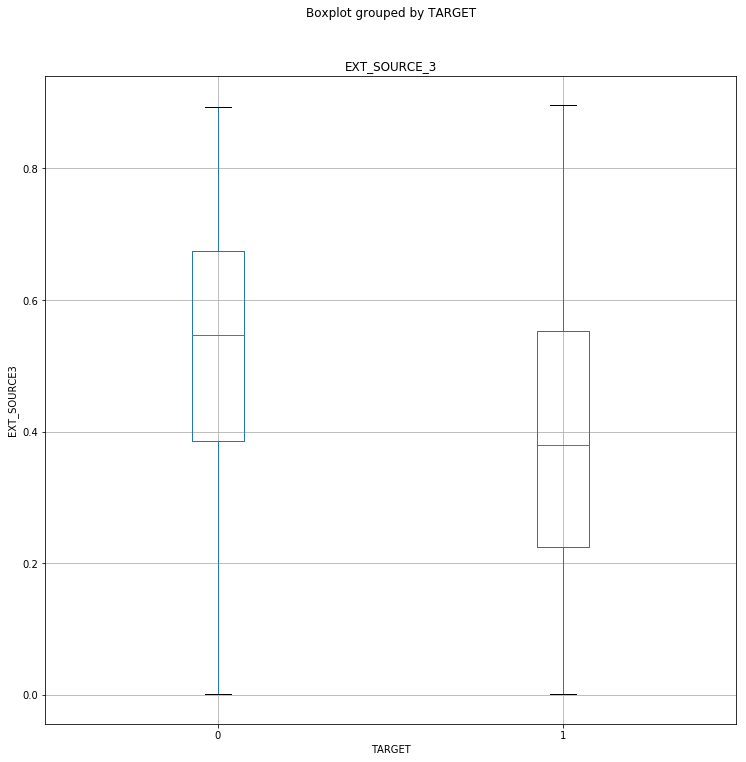

In [8]:
app_train.boxplot(column='EXT_SOURCE_3', by = 'TARGET' , showfliers = False, figsize=(12,12))

plt.xlabel('TARGET')
plt.ylabel('EXT_SOURCE3')
plt.show()

Text(0.5,0,'TARGET')

Text(0,0.5,'EXT_SOURCE2')

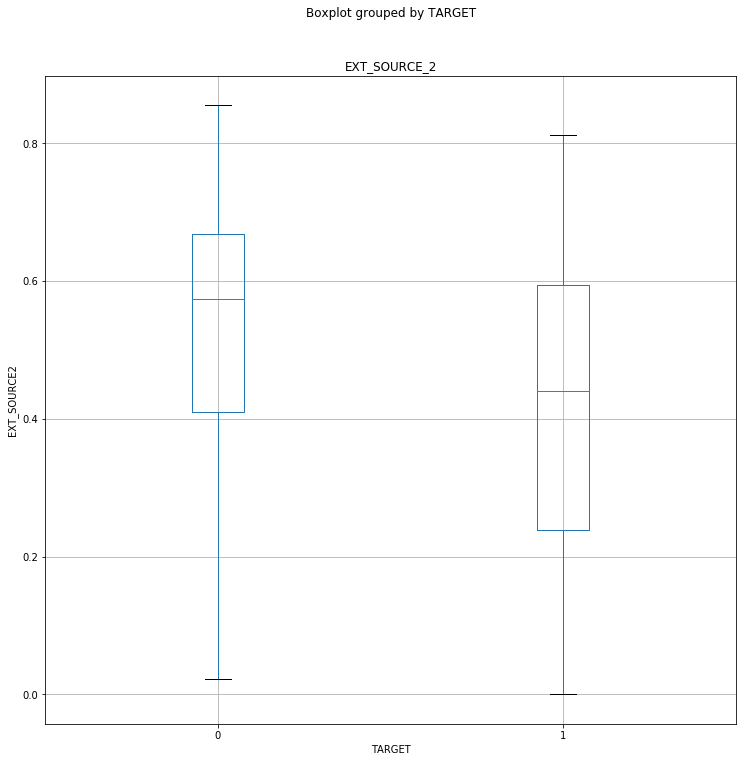

In [9]:
app_train.boxplot(column='EXT_SOURCE_2', by = 'TARGET' , showfliers = False, figsize=(12,12))

plt.xlabel('TARGET')
plt.ylabel('EXT_SOURCE2')
plt.show()

Text(0.5,0,'TARGET')

Text(0,0.5,'EXT_SOURCE1')

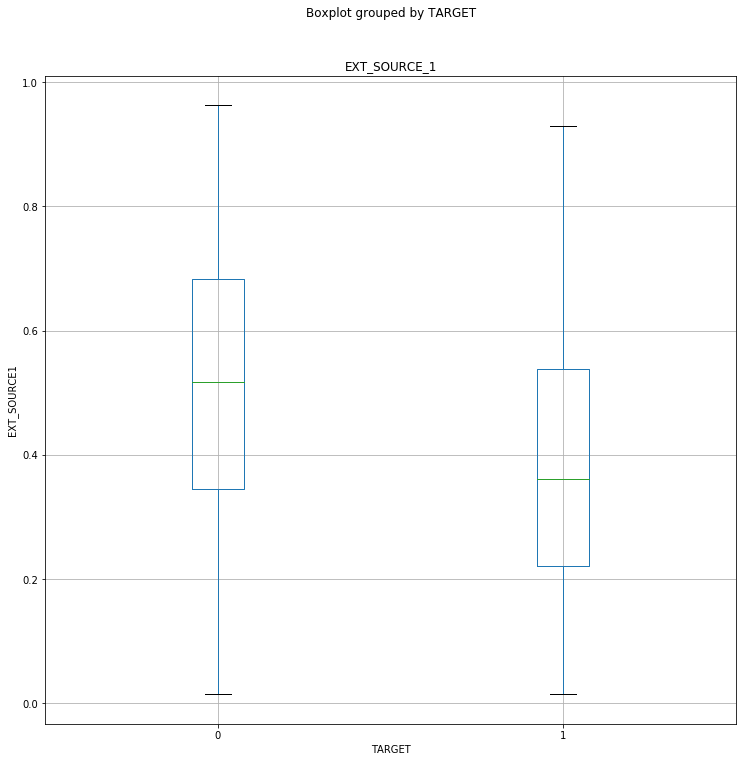

In [10]:
app_train.boxplot(column='EXT_SOURCE_1', by = 'TARGET' , showfliers = False, figsize=(12,12))

plt.xlabel('TARGET')
plt.ylabel('EXT_SOURCE1')
plt.show()

Text(0.5,0,'TARGET')

Text(0,0.5,'DAYS_BIRTH')

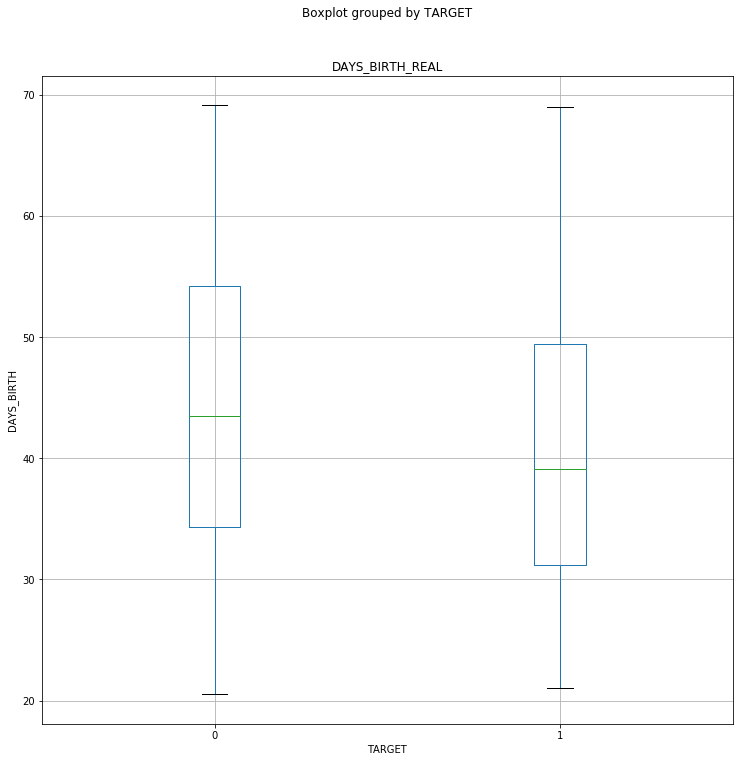

In [11]:
app_train['DAYS_BIRTH_REAL'] = app_train['DAYS_BIRTH'] / 365
app_train.boxplot(column='DAYS_BIRTH_REAL', by = 'TARGET' , showfliers = False, figsize=(12,12))

plt.xlabel('TARGET')
plt.ylabel('DAYS_BIRTH')
plt.show()

array([[230302,  21835],
       [ 52384,   2990]])

Text(0.5,1,'Confusion Matrix')

([<matplotlib.axis.XTick at 0x7fbc044e7588>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7fbc044ef2e8>,
 <a list of 2 Text yticklabel objects>)

Text(0,0.5,'DAYS_EMPLOYED_ANOM')

Text(0.5,0,'Target')

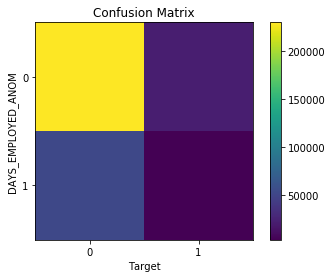

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(app_train['DAYS_EMPLOYED_ANOM'],app_train['TARGET'])
plt.imshow(confusion_matrix(app_train['DAYS_EMPLOYED_ANOM'],app_train['TARGET']))
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['0','1']))
plt.xticks(tick_marks, ['0','1'])
plt.yticks(tick_marks, ['0','1'])
plt.ylabel('DAYS_EMPLOYED_ANOM')
plt.xlabel('Target')
plt.show()

Text(0.5,0,'TARGET')

Text(0,0.5,'FLOORSMAX_AVG')

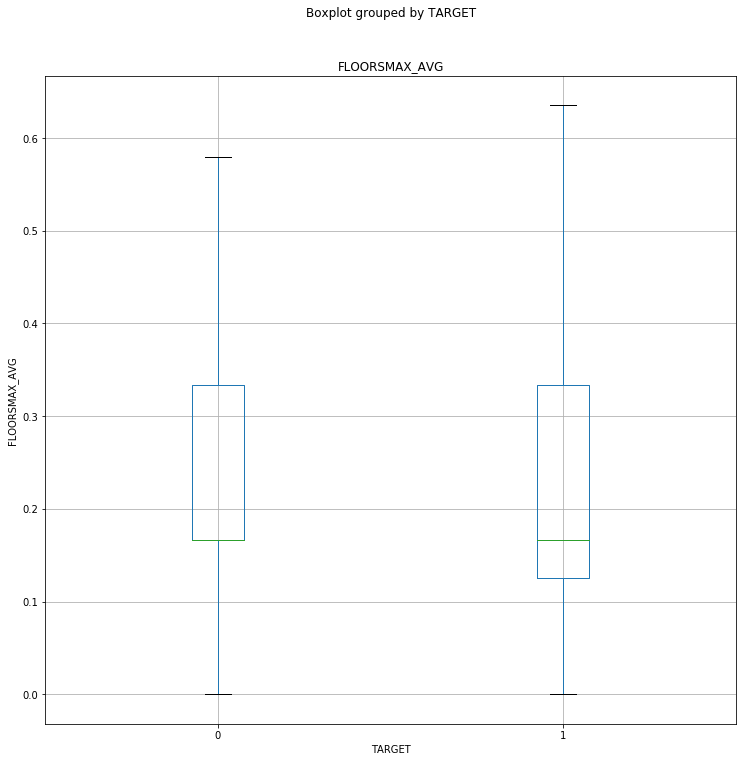

In [13]:
app_train.boxplot(column='FLOORSMAX_AVG', by = 'TARGET' , showfliers = False, figsize=(12,12))

plt.xlabel('TARGET')
plt.ylabel('FLOORSMAX_AVG')
plt.show()

Text(0.5,0,'Days of employed (year)')

Text(0,0.5,'TARGET')

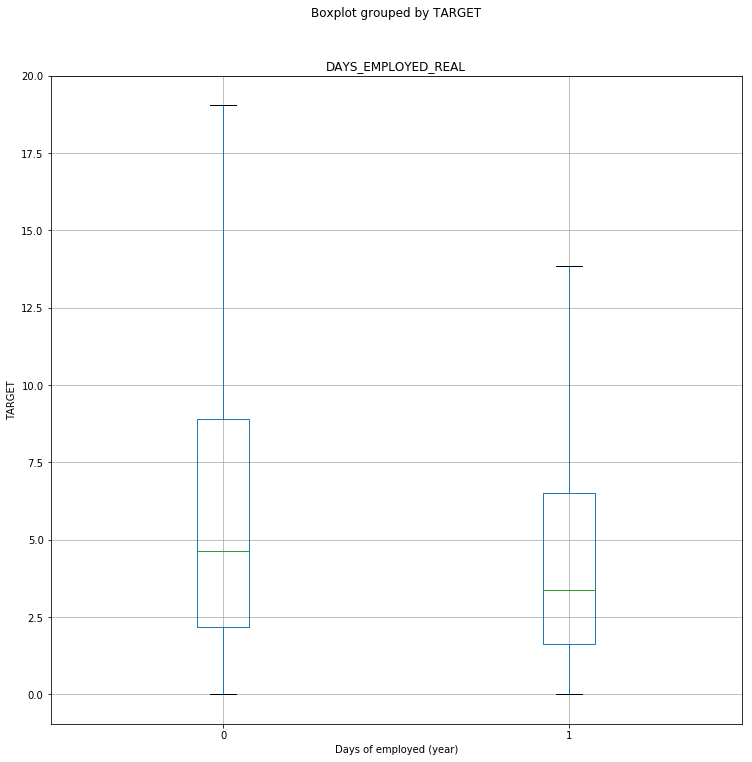

Correlation: nan


In [14]:
sub_df = app_train[app_train['DAYS_EMPLOYED'] != 365243]
sub_df['DAYS_EMPLOYED_REAL'] = sub_df['DAYS_EMPLOYED'] / (-365)
sub_df.boxplot(column='DAYS_EMPLOYED_REAL', by = 'TARGET' , showfliers = False, figsize=(12,12))

plt.xlabel('Days of employed (year)')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))